# *KMeans Clustering*

### *What is KMeans Clustering* :

-It is an unsupervised machine learning algorithm that follows the method of classifying of data into 'k' number of clusters.
    
    
### *Why this method?* :

- I have used KMeans clustering to separate the neighborhood in Vancouver according to its factors(severity,type of crime).


### *Procedure* :

- First, by using label encoder from sklearn.prepreocessing, converts strings to specific integers, and scale the dataset by standard 
scaler.
- By using 'The Elbow Method', find the optimal number of clusters.
- After determining the optimal number of clusters, use the KMeans Clustering to separate into different clusters.
- Lower the dimensions of clusters to 2D for visualization with T-SNE.
- Lastly, explore each cluster.

## _Importing Modules_

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans

In [67]:
data = pd.read_csv('cleaned_crime.csv')

In [68]:
# Making all the column names as lower cases
new_cols = []
for i in data.columns :
    new_cols.append(i.lower())
data.columns = new_cols

In [69]:
vancouver = data[((data['longitude'] <= -123) & (data['longitude'] >=-123.3)) & ((data['latitude']>=49.2) &(data['latitude'] <=49.4)) ]

## *Preprocessing*

In [70]:
encoder = LabelEncoder()

- Since there are unknown neighbourhoods, I will drop the unknown neighborhoods as it will be meaningless during clustering.

In [71]:
data
new_data = data.pivot_table('year',index='neighbourhood',columns='type',aggfunc=len)
new_data = new_data.drop(['Homicide','Offence Against a Person'],axis=1)
new_data = new_data.drop(['Unknowned'],axis=0)
new_data

type,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury)
neighbourhood,,,,,,,,,
Arbutus Ridge,325.0,1672.0,934.0,337.0,1852.0,160.0,498.0,3.0,285.0
Central Business District,9371.0,3505.0,16672.0,19244.0,48003.0,6907.0,4016.0,41.0,3188.0
Dunbar-Southlands,294.0,1847.0,1324.0,241.0,2899.0,240.0,629.0,3.0,269.0
Fairview,3303.0,3834.0,3196.0,3269.0,11934.0,3394.0,2037.0,14.0,1180.0
Grandview-Woodland,2082.0,4515.0,4970.0,2508.0,7342.0,1403.0,3111.0,9.0,1240.0
Hastings-Sunrise,929.0,3199.0,2904.0,1379.0,5654.0,321.0,2452.0,18.0,1270.0
Kensington-Cedar Cottage,1277.0,4136.0,3760.0,2961.0,7474.0,859.0,2919.0,11.0,1544.0
Kerrisdale,326.0,1826.0,1049.0,265.0,2805.0,179.0,547.0,7.0,443.0
Killarney,302.0,2130.0,1761.0,245.0,3990.0,163.0,1302.0,12.0,570.0


### *Scaling*
- By scaling the dataset with Standard Scaler, it will converts the dataset into a distribution with a mean value 0 and standard deviation of 1.

In [72]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_data)
scaled_data = pd.DataFrame(scaled_data,columns = new_data.columns)

In [73]:
scaled_data

type,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury)
0,-0.567518,-0.703709,-0.610961,-0.473717,-0.564833,-0.577042,-0.993255,-0.915741,-0.946025
1,4.163700,0.789589,4.222467,4.403374,4.383030,3.713099,2.183354,3.673029,3.434345
2,-0.583731,-0.561141,-0.491185,-0.498481,-0.452584,-0.526173,-0.874967,-0.915741,-0.970167
3,0.990029,1.057617,0.083741,0.282597,0.516061,1.479326,0.396399,0.412587,0.404451
4,0.351424,1.612410,0.628569,0.086296,0.023752,0.213331,1.366176,-0.191199,0.494986
5,-0.251615,0.540299,-0.005938,-0.204932,-0.157219,-0.474669,0.771127,0.895615,0.540253
6,-0.069605,1.303648,0.256956,0.203148,0.037903,-0.132577,1.192808,0.050315,0.953695
7,-0.566995,-0.578249,-0.575642,-0.492290,-0.462662,-0.564961,-0.949010,-0.432713,-0.707617
8,-0.579547,-0.330588,-0.356974,-0.497449,-0.335617,-0.575135,-0.267276,0.171073,-0.515985
9,0.356654,1.510576,0.236072,-0.114391,0.192072,0.887977,0.693472,0.291830,0.193204


### *The Elbow Method*
- To find the optimal number of clusters.

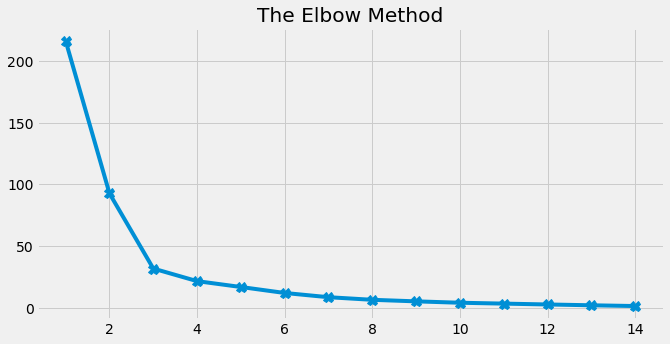

In [74]:
inertia = []
for i in range(1,15):
    km = KMeans(n_clusters=i,max_iter=100,n_init=10,random_state=100).fit(scaled_data)
    inertia.append(km.inertia_)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))
plt.title('The Elbow Method')
plt.plot(range(1,15),inertia,marker='X',markersize=10)

- The elbow is at 3. Therefore, the optimal number of clusters would be 3.

### *KMeans Clustering*

In [75]:
km = KMeans(n_clusters=3,max_iter=100,n_init = 10,random_state=100)
pred = km.fit_predict(scaled_data)

### *T-SNE*
- t-Distributed Stochastic Neighbor Embedding (t-SNE) is an unsupervised and non-linear method to visualize the higher dimensional dataset.
- Since the scaled dataset has higher dimensions, I have used T-SNE to reduce the dimensions to 2D in order to have a graph for easier visualizations.

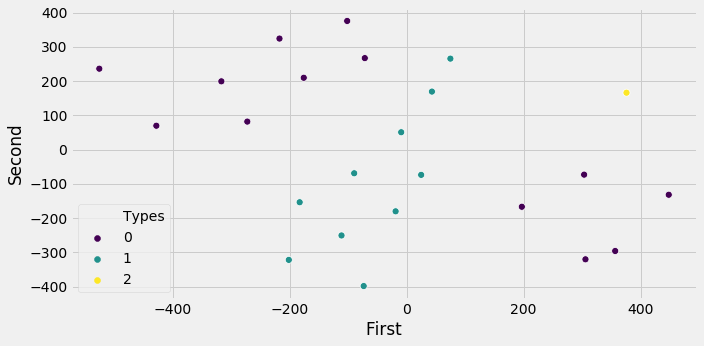

In [76]:
# Let's Use t-sne for visualizing
from sklearn.manifold import TSNE


tsne =TSNE(n_components = 2,perplexity=10) 
data_tsne = pd.DataFrame(tsne.fit_transform(new_data))
data_tsne = data_tsne.rename(columns= {0:'First',1:'Second'})
data_tsne['Types'] = pred

plt.figure(figsize=(10,5))
sns.scatterplot(data_tsne['First'],data_tsne['Second'],hue=data_tsne['Types'],palette='viridis',s=50)

- We can realize that cluster 2 contains only 1 data. On the other hand, data with clusters 0 and 1 both have more than 10 data.The distance between cluster 0 and 2 are the furthest. Cluster 1 is closer to cluster 2. As distance between clusters show their similarities. Hence we can deduce that cluster 0 and 2 has the biggest difference characteristics while cluster 1 has similar characters with both cluster 0 and 2.

- Then now, let's explore more in-depth on each cluster.

### *Cluster 0*

Total Cases In This Cluster are 97010


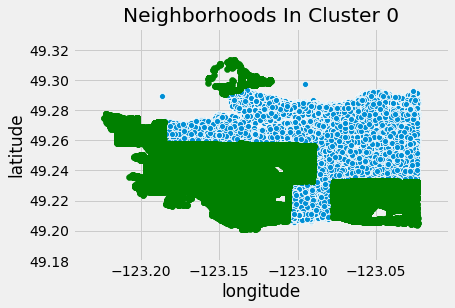

In [77]:
# clusters : regional,safetiness, type of cases
cluster_0 = new_data[pred==0].index
sns.scatterplot(vancouver['longitude'],vancouver['latitude'])
plt.title('Neighborhoods In Cluster 0')
for i in cluster_0:
    d = data[data['neighbourhood']== i]   # Taking the neighborhood in Cluster 0
    plt.scatter(d['longitude'],d['latitude'],color='green')

cases = 0
for i in new_data[pred==0].values.flatten():
    cases = cases + int(i)
print('Total Cases In This Cluster are {}'.format(cases))

In [78]:
new_data[pred==0]

type,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury)
neighbourhood,,,,,,,,,
Arbutus Ridge,325.0,1672.0,934.0,337.0,1852.0,160.0,498.0,3.0,285.0
Dunbar-Southlands,294.0,1847.0,1324.0,241.0,2899.0,240.0,629.0,3.0,269.0
Kerrisdale,326.0,1826.0,1049.0,265.0,2805.0,179.0,547.0,7.0,443.0
Killarney,302.0,2130.0,1761.0,245.0,3990.0,163.0,1302.0,12.0,570.0
Marpole,1098.0,2527.0,1905.0,612.0,4151.0,232.0,1617.0,10.0,931.0
Musqueam,17.0,86.0,104.0,1.0,217.0,7.0,40.0,1.0,59.0
Oakridge,332.0,2089.0,889.0,1176.0,2290.0,172.0,669.0,6.0,414.0
Riley Park,848.0,2706.0,1795.0,410.0,4269.0,621.0,1197.0,4.0,671.0
Shaughnessy,129.0,1774.0,633.0,25.0,1769.0,139.0,371.0,7.0,579.0


### *Cluster 1*

Total Cases In This Cluster are 266071


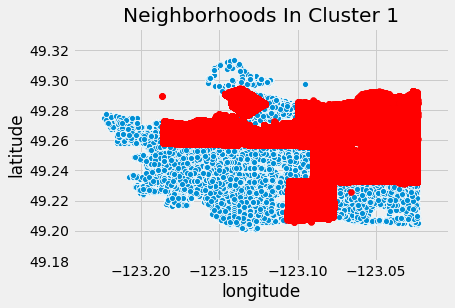

In [79]:
cluster_1 = new_data[pred==1].index
sns.scatterplot(vancouver['longitude'],vancouver['latitude'])
plt.title('Neighborhoods In Cluster 1')
for i in cluster_1:
    d = data[data['neighbourhood']== i]
    plt.scatter(d['longitude'],d['latitude'],color='red')
cases = 0
for i in new_data[pred==1].values.flatten():
    cases = cases + int(i)
print('Total Cases In This Cluster are {}'.format(cases))

In [80]:
new_data[pred==1]


type,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury)
neighbourhood,,,,,,,,,
Fairview,3303.0,3834.0,3196.0,3269.0,11934.0,3394.0,2037.0,14.0,1180.0
Grandview-Woodland,2082.0,4515.0,4970.0,2508.0,7342.0,1403.0,3111.0,9.0,1240.0
Hastings-Sunrise,929.0,3199.0,2904.0,1379.0,5654.0,321.0,2452.0,18.0,1270.0
Kensington-Cedar Cottage,1277.0,4136.0,3760.0,2961.0,7474.0,859.0,2919.0,11.0,1544.0
Kitsilano,2092.0,4390.0,3692.0,1730.0,8912.0,2464.0,2366.0,13.0,1040.0
Mount Pleasant,2769.0,3278.0,4070.0,3698.0,9679.0,2746.0,2654.0,18.0,1624.0
Renfrew-Collingwood,1197.0,4296.0,3886.0,4119.0,8420.0,419.0,3011.0,12.0,1401.0
Strathcona,2168.0,2019.0,4556.0,994.0,7343.0,1015.0,1650.0,20.0,1154.0
Sunset,1105.0,2578.0,3243.0,1401.0,5226.0,255.0,2275.0,17.0,1296.0


### *Cluster 2*

Total Cases In This Cluster are 110947


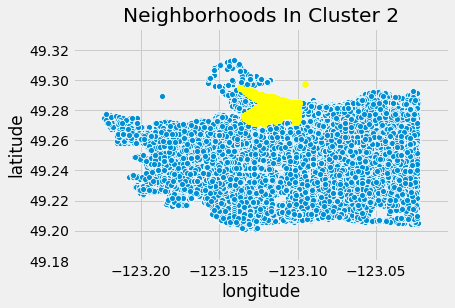

In [81]:
cluster_2 = new_data[pred==2].index
sns.scatterplot(vancouver['longitude'],vancouver['latitude'])
plt.title('Neighborhoods In Cluster 2')
for i in cluster_2:
    d = data[data['neighbourhood']== i]
    plt.scatter(d['longitude'],d['latitude'],color='yellow')

cases = 0
for i in new_data[pred==2].values.flatten():
    cases = cases + int(i)
print('Total Cases In This Cluster are {}'.format(cases))

In [82]:
new_data[pred==2]

type,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury)
neighbourhood,,,,,,,,,
Central Business District,9371.0,3505.0,16672.0,19244.0,48003.0,6907.0,4016.0,41.0,3188.0


- Cluster 0 has the most safest neighbourhoods with the least total number of cases. Mainly West Vancouver.
- Cluster 1 has the most dangerous neighbourhoods with the most total number of cases. Main East Vancouver.
- Cluster 2 only contains data from Central Business District. It had more cases than cluster 0 but less than cluster 2.
- The distance between cluster 1 and 2 were closer since they are both relatively more dangerous than neighbourhood in cluster 0.